<div class = "page-header">
    <h1 class = "alert alert-info">
    Study of standard clustering techniques<br/>
    <small>
        Henrique Gasparini Fiuza do Nascimento - started: 04/02/2017<br/>
    </small>
    </h1> 
</div>

<div class="alert alert-success">
    <h2>
        Imports
    </h2>
</div>
<h4 class="alert alert-warning">Importing libraries and checking working directory</h4>

In [68]:
import pandas as pd
import numpy as np

# import libraries for visualization
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab


#import libraries for features decomposition
import sklearn as sk
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

#Visualization param
pd.options.display.max_columns = None
pd.options.display.max_rows = None

<h4 class="alert alert-warning">Actually importing the data</h4>

Deciding which data to work with was not straightforward. While the paper used players statistics in a per minutes basis, we decided to use them in absolute values. This decisions came from the poor results obtained in PCA and in the evaluation of these methods by some well-known criteria, like random index and the silhouette score.

In [43]:
#import data
df = pd.read_csv('../../Data/NBA-data-With-Positions.csv')
print "(rows,cols) =",df.shape
df.head(5)

(rows,cols) = (476, 30)


,Unnamed: 0,Player,TEAM,AGE,GP,W,L,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PTS,+/-,PosicAbbrev
0,0,Aaron Brooks,CHI,31,69,36,33,16.1,2.7,6.8,40.1,1.0,2.7,35.7,0.7,0.9,76.6,0.3,1.2,1.5,2.6,1.2,0.4,0.1,1.9,0,0,7.1,-0.1,PG
1,1,Aaron Gordon,ORL,20,78,32,46,23.9,3.5,7.4,47.3,0.5,1.8,29.6,1.7,2.5,66.8,2.0,4.5,6.5,1.6,0.8,0.8,0.7,2.0,12,0,9.2,-1.0,PF
2,2,Aaron Harrison,CHA,21,21,15,6,4.4,0.2,0.9,26.3,0.1,0.5,30.0,0.2,0.6,41.7,0.2,0.5,0.7,0.1,0.2,0.3,0.0,0.5,0,0,0.9,-0.3,SG
3,3,Adreian Payne,MIN,25,52,18,34,9.3,1.0,2.8,36.6,0.2,0.6,28.1,0.3,0.5,65.4,0.4,1.8,2.1,0.6,0.7,0.3,0.2,1.5,0,0,2.5,-2.3,PF
4,4,Al Horford,ATL,30,82,48,34,32.1,6.5,12.8,50.5,1.1,3.1,34.4,1.3,1.6,79.8,1.8,5.5,7.3,3.2,1.3,0.8,1.5,2.0,17,0,15.2,2.8,C


In [33]:
df.describe()

,Unnamed: 0,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,+/-,PosicNumber
count,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,237.500000,27.052521,54.785714,27.464286,27.321429,1249.697479,0.388082,0.145575,0.328062,44.315966,0.031899,0.093187,27.020588,0.065033,0.088872,71.973319,0.045326,0.136389,0.181715,0.082187,0.055586,0.031932,0.021020,0.093142,0.002341,0.000061,-0.054256,1.880252
std,137.553626,4.407574,24.274576,16.478017,15.219228,845.899601,0.129595,0.050148,0.094805,8.783619,0.030450,0.071533,16.227345,0.038855,0.052069,17.903679,0.037819,0.056240,0.085116,0.057136,0.025943,0.018607,0.021782,0.036185,0.004232,0.000417,0.225870,1.373566
min,0.000000,19.000000,1.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.666667,0.000000
25%,118.750000,24.000000,37.000000,14.000000,15.000000,473.250000,0.305358,0.111777,0.260750,40.400000,0.003797,0.024265,20.000000,0.038462,0.054381,66.700000,0.016862,0.093688,0.114596,0.044118,0.040139,0.022249,0.006658,0.068182,0.000000,0.000000,-0.127449,1.000000
50%,237.500000,26.000000,62.000000,28.000000,28.000000,1229.000000,0.376882,0.142075,0.320256,43.900000,0.029763,0.095114,32.350000,0.058933,0.080246,75.400000,0.031897,0.125157,0.161617,0.063987,0.052023,0.029754,0.014238,0.086321,0.000000,0.000000,-0.031413,2.000000
75%,356.250000,30.000000,76.000000,40.000000,38.000000,1973.250000,0.460069,0.174128,0.386401,48.200000,0.050396,0.140982,36.725000,0.084538,0.114711,82.600000,0.068989,0.171326,0.235606,0.109149,0.069300,0.038351,0.028140,0.109916,0.002764,0.000000,0.049362,3.000000
max,475.000000,40.000000,82.000000,73.000000,71.000000,3125.000000,1.000000,0.500000,0.666667,100.000000,0.333333,0.340909,100.000000,0.230400,0.333333,100.000000,0.263889,0.352941,0.558824,0.330706,0.201389,0.200000,0.192982,0.333333,0.024756,0.006548,0.666667,4.000000


<h4 class="alert alert-warning">Saving positions numbers</h4>

In [44]:
dict = {' PG': 0, ' PF': 1, ' SG' : 2, ' SF' : 3, ' C' : 4}
invdict = {v: k for k, v in dict.iteritems()}

actual_positions = [dict[x] for x in df['PosicAbbrev']]
df = df.select_dtypes(include=['number']).drop(['Unnamed: 0'], 1)

In [72]:
df.head(5)

,AGE,GP,W,L,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PTS,+/-
0,0.896555,0.586179,0.518551,0.373511,-0.440379,-0.201424,-0.034346,-0.480486,0.437663,0.395753,0.535426,-0.562470,-0.612833,0.258693,-0.736339,-0.879753,-0.881690,0.440951,0.067957,-0.577923,-0.703863,0.209539,-0.465911,-0.138823,-0.221260,0.097508
1,-1.601775,0.957327,0.275548,1.228592,0.406133,0.188522,0.101516,0.340085,-0.263776,-0.087958,0.159122,0.202926,0.356499,-0.289257,1.458304,0.987449,1.197191,-0.128945,-0.443465,0.334486,0.636292,0.344323,0.797757,-0.138823,0.150644,-0.195221
2,-1.374654,-1.393279,-0.757215,-1.402427,-1.710147,-1.420006,-1.370323,-2.053245,-0.824928,-0.786651,0.183798,-0.945168,-0.794582,-1.692678,-0.865436,-1.275826,-1.214311,-0.983789,-1.210596,-0.806025,-0.927223,-1.677443,-0.465911,-0.138823,-1.319263,0.032457
3,-0.466170,-0.114879,-0.574963,0.439286,-1.178363,-1.030060,-0.940093,-0.879374,-0.684640,-0.732905,0.066588,-0.868628,-0.855166,-0.367535,-0.607242,-0.540262,-0.632224,-0.698841,-0.571320,-0.806025,-0.480504,-0.329599,-0.465911,-0.138823,-1.035907,-0.618051
4,0.669434,1.122282,1.247560,0.439286,1.296056,1.650820,1.324274,0.704782,0.577950,0.610736,0.455230,-0.103232,-0.188750,0.437615,1.200111,1.553268,1.529811,0.782888,0.195812,0.334486,2.423167,0.344323,1.324286,-0.138823,1.213228,1.040745


<h4 class="alert alert-warning">Scaling data</h4>

In [62]:
cols = df.columns
df = sk.preprocessing.scale(df)
df = pd.DataFrame(df, columns=cols)

<div class="alert alert-success">
    <h2>
        Feature Selection
    </h2>
</div>
<h4 class="alert alert-warning">We remind the sets of selected features and build sub-dataframes for each of them</h4>

In [47]:
laplacian_score_features = [u'TD3', u'3PM', u'3P%', u'PTS', u'FGM', u'3PA', u'FG%']
spec_features = [u'+/-', u'PF', u'STL', u'AGE', u'BLK', u'OREB', u'TOV']
mcfs_features = [u'OREB', u'DREB', u'STL', u'3PA', u'PF', u'+/-', u'AGE']
papers_features = ['REB','AST','TOV','STL','BLK','PF','PTS']

In [48]:
laplacian_df = df[laplacian_score_features]
spec_df = df[spec_features]
mcfs_df = df[mcfs_features]
papers_df = df[papers_features]

<div class="alert alert-success">
    <h2>
        Clustering Analysis
    </h2>
</div>

<h4 class="alert alert-warning">1 - KMeans</h4>

In [152]:
from sklearn.cluster import KMeans
def getKMeansLabels(df):
    estimator = KMeans(n_clusters=5)
    estimator.fit(df)
    return estimator.labels_

In [153]:
labels_set = {}
labels_set['Laplacian - KMeans'] = getKMeansLabels(laplacian_df)
labels_set['SPEC - KMeans'] = getKMeansLabels(spec_df)
labels_set['MCFS - KMeans'] = getKMeansLabels(mcfs_df)
labels_set['Paper - KMeans'] = getKMeansLabels(papers_df)
labels_set['All - KMeans'] = getKMeansLabels(df)

<h4 class="alert alert-warning">1.1 - Compute scores</h4>

In [154]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score

In [155]:
print "Random Index scores:"
for k,v in labels_set.iteritems():
    print k, adjusted_rand_score(v, actual_positions)

Random Index scores:
SPEC - KMeans 0.048900464999
All - KMeans 0.0504353645079
Paper - KMeans 0.0492819690637
MCFS - KMeans 0.0367789351414
Laplacian - KMeans 0.0997681772956


In [156]:
print "Silhouette scores:"
for k, v in labels_set.iteritems():
    print k, silhouette_score(df, v)

Silhouette scores:
SPEC - KMeans 0.087809946215
All - KMeans 0.168626716571
Paper - KMeans 0.107278782236
MCFS - KMeans 0.0873424551274
Laplacian - KMeans 0.101680290395


<h4 class="alert alert-warning">1.2 - Plotting</h4>

In [157]:
def plotClustering(df, labels, legend, dim=2):
    df_scaled = sk.preprocessing.scale(df)
    pca = sk.decomposition.PCA(n_components=10, whiten=True)
    df_red = pca.fit_transform(df_scaled)

    if dim==3:
        #print pca.explained_variance_ratio_
        #print "variance sum =",sum(pca.explained_variance_ratio_)    
        fig = plt.figure(1, figsize=(4, 3))
        ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
        ax.scatter(df_red[:, 0], df_red[:, 1], df_red[:, 2], c=labels)    
        return

    statesN = [0,1,2,3,4]
    states = [invdict[x] for x in statesN]
    states    
    import matplotlib.patches as mpatches
    pylab.title("Performing PCA\n"+legend)
    pylab.xlabel("Dim 1")
    pylab.ylabel("Dim 2")
    #pylab.scatter(df_red[:, 0], df_red[:, 1], c=position_labels)

    states = [invdict[x] for x in [0,1,2,3,4]]
    for i,l in enumerate(states):
        x = []
        y = []
        for j,_ in enumerate(df_red[:, 0]):
            if labels[j] == i+1:
                x.append(df_red[j,0])
                y.append(df_red[j,1])
        pylab.scatter(x,y,label=l,color = np.random.rand(3,1) )

    pylab.legend(loc='upper center', bbox_to_anchor=(1.05, .4) ,scatterpoints = 1)
    pylab.show()


    pylab.title("Explained variance ratio\n"+legend) 
    pylab.xlabel("Dim 1")
    pylab.ylabel("Dim 2")
    pylab.ylim(0,.45)
    x_axis =[x+.5 for x in range(len(pca.explained_variance_ratio_))]
    pylab.bar(x_axis,pca.explained_variance_ratio_)
    

In [158]:
print "Plotting:"
for k,v in labels_set.iteritems():
    print k

Plotting:
SPEC - KMeans
All - KMeans
Paper - KMeans
MCFS - KMeans
Laplacian - KMeans


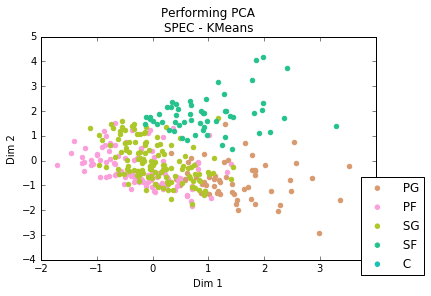

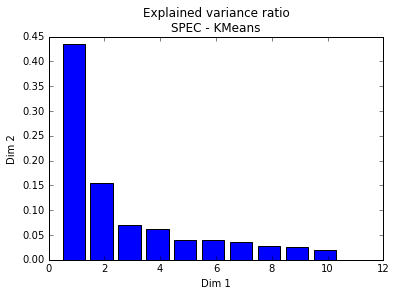

In [159]:
plotClustering(df, labels_set['SPEC - KMeans'], 'SPEC - KMeans')

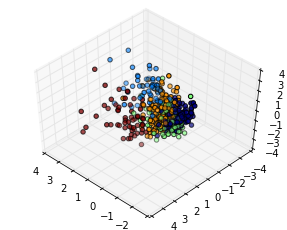

In [160]:
plotClustering(df, labels_set['SPEC - KMeans'], 'SPEC - KMeans', dim=3)

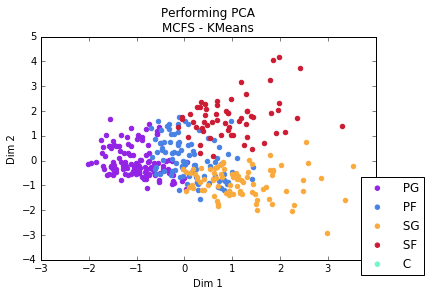

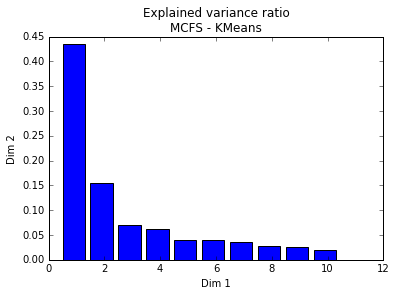

In [161]:
plotClustering(df, labels_set['MCFS - KMeans'], 'MCFS - KMeans')

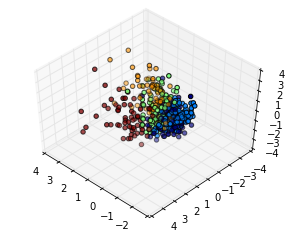

In [162]:
plotClustering(df, labels_set['MCFS - KMeans'], 'MCFS - KMeans', dim=3)

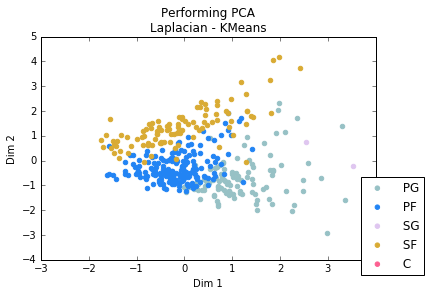

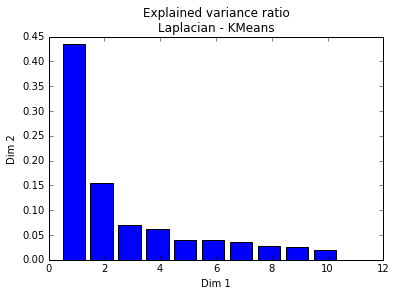

In [163]:
plotClustering(df, labels_set['Laplacian - KMeans'], 'Laplacian - KMeans')

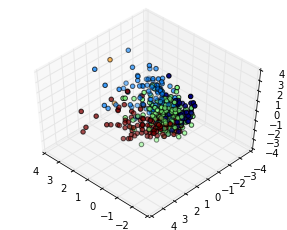

In [164]:
plotClustering(df, labels_set['Laplacian - KMeans'], 'Laplacian - KMeans', dim=3)

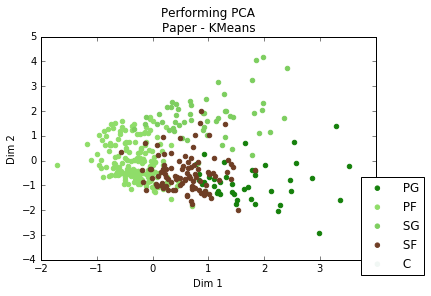

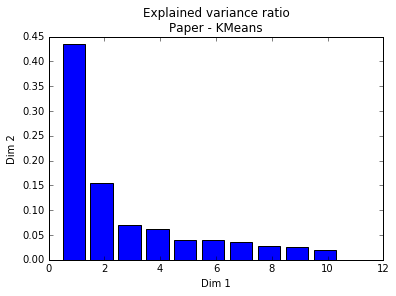

In [165]:
plotClustering(df, labels_set['Paper - KMeans'], 'Paper - KMeans')

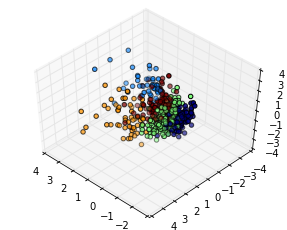

In [166]:
plotClustering(df, labels_set['Paper - KMeans'], 'Paper - KMeans', dim=3)

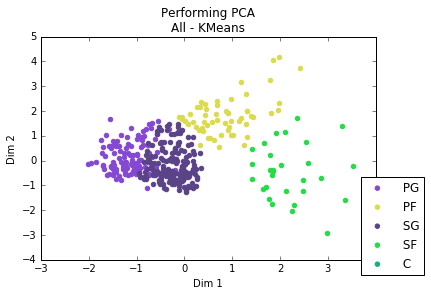

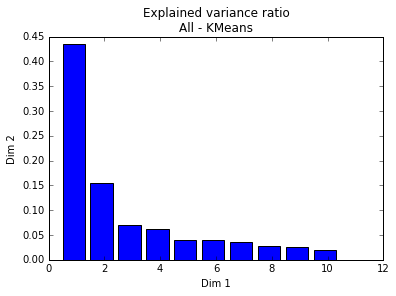

In [167]:
plotClustering(df, labels_set['All - KMeans'], 'All - KMeans')

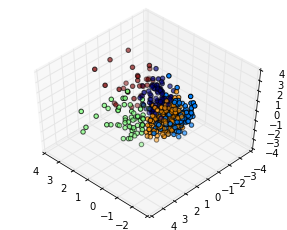

In [168]:
plotClustering(df, labels_set['All - KMeans'], 'All - KMeans', dim=3)

<h4 class="alert alert-warning">2 - Agglomerative Clustering</h4>

In [174]:
from sklearn.cluster import AgglomerativeClustering
def getAgglomerativeLabels(df, linkage):
    model = AgglomerativeClustering(linkage=linkage, n_clusters=5)
    model.fit(df)
    return model.labels_

In [175]:
linkages = ['ward', 'average', 'complete']
labels_set = {}

for li in linkages:
    labels_set['Laplacian - Agglomerative - '+li] = getAgglomerativeLabels(laplacian_df, li)
for li in linkages:
    labels_set['SPEC - Agglomerative - '+li] = getAgglomerativeLabels(spec_df, li)
for li in linkages:
    labels_set['MCFS - Agglomerative - '+li] = getAgglomerativeLabels(mcfs_df, li)
for li in linkages:
    labels_set['Paper - Agglomerative - '+li] = getAgglomerativeLabels(papers_df, li)
for li in linkages:
    labels_set['All - Agglomerative - '+li] = getAgglomerativeLabels(df, li)

<h4 class="alert alert-warning">2.1 - Compute scores</h4>

In [176]:
print "Random Index scores:"
for k,v in labels_set.iteritems():
    print k, adjusted_rand_score(v, actual_positions)

Random Index scores:
SPEC - Agglomerative - complete 0.0272762149846
SPEC - Agglomerative - average 0.000890674189752
SPEC - Agglomerative - ward 0.0522760529497
Laplacian - Agglomerative - ward 0.0616685906108
MCFS - Agglomerative - ward 0.060216192633
Paper - Agglomerative - complete 0.0934378231345
All - Agglomerative - ward 0.0849040587466
Paper - Agglomerative - average 0.00351209868691
MCFS - Agglomerative - complete 0.0126547453314
Paper - Agglomerative - ward 0.0654187570737
Laplacian - Agglomerative - complete 0.0768481671453
Laplacian - Agglomerative - average 4.17554954454e-05
All - Agglomerative - complete 0.00859342587437
All - Agglomerative - average 0.00256170059502
MCFS - Agglomerative - average 0.00103293108934


In [173]:
print "Silhouette scores:"
for k, v in labels_set.iteritems():
    print k, silhouette_score(df, v)

Silhouette scores:
SPEC - Agglomerative - complete 0.0914130027285
SPEC - Agglomerative - average 0.359904591235
SPEC - Agglomerative - ward 0.064325617986
Laplacian - Agglomerative - ward 0.115679835419
MCFS - Agglomerative - ward 0.0790586031541
Paper - Agglomerative - complete 0.185054981477
All - Agglomerative - ward 0.104276475901
Paper - Agglomerative - average 0.359676158063
MCFS - Agglomerative - complete 0.170651595336
Paper - Agglomerative - ward 0.0968643496806
Laplacian - Agglomerative - complete 0.0876041493824
Laplacian - Agglomerative - average 0.267915660562
All - Agglomerative - complete 0.192151472524
All - Agglomerative - average 0.368151014711
MCFS - Agglomerative - average 0.190083207675


In [118]:
print "Plotting:"
for k,v in labels_set.iteritems():
    print k
    

Plotting:
SPEC - Agglomerative - complete
SPEC - Agglomerative - average
SPEC - Agglomerative - ward
Laplacian - Agglomerative - ward
MCFS - Agglomerative - ward
Paper - Agglomerative - complete
All - Agglomerative - ward
Paper - Agglomerative - average
MCFS - Agglomerative - complete
Paper - Agglomerative - ward
Laplacian - Agglomerative - complete
Laplacian - Agglomerative - average
All - Agglomerative - complete
All - Agglomerative - average
MCFS - Agglomerative - average


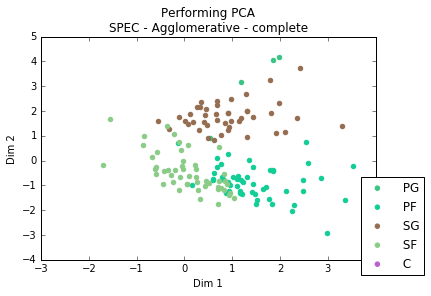

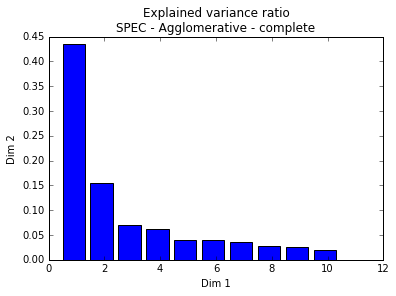

In [119]:
plotClustering(df, labels_set['SPEC - Agglomerative - complete'], 'SPEC - Agglomerative - complete')

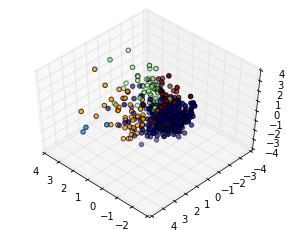

In [120]:
plotClustering(df, labels_set['SPEC - Agglomerative - complete'], 'SPEC - Agglomerative - complete', dim=3)

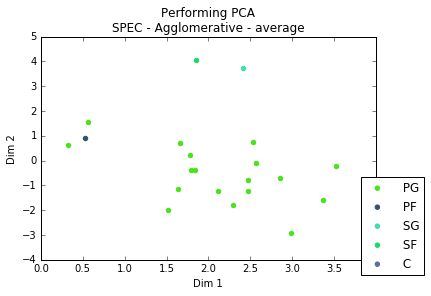

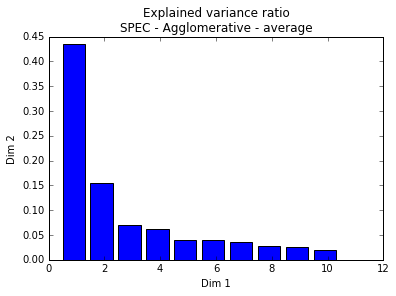

In [116]:
plotClustering(df, labels_set['SPEC - Agglomerative - average'], 'SPEC - Agglomerative - average')

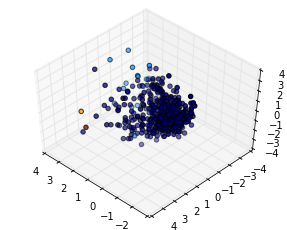

In [121]:
plotClustering(df, labels_set['SPEC - Agglomerative - average'], 'SPEC - Agglomerative - average', dim=3)

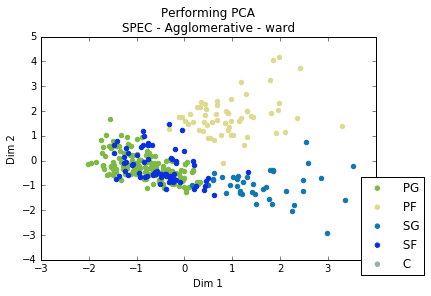

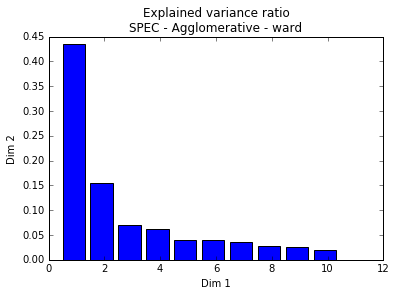

In [123]:
plotClustering(df, labels_set['SPEC - Agglomerative - ward'], 'SPEC - Agglomerative - ward')

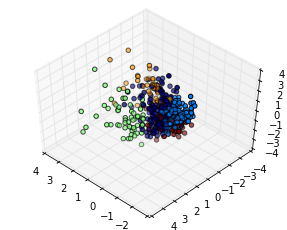

In [124]:
plotClustering(df, labels_set['SPEC - Agglomerative - ward'], 'SPEC - Agglomerative - ward', dim=3)

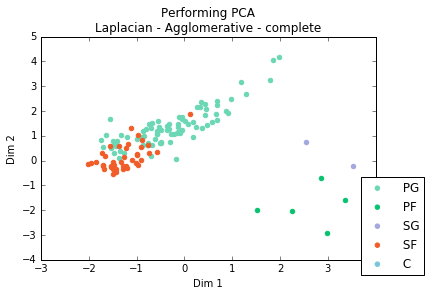

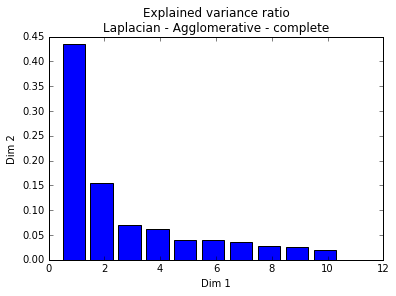

In [125]:
plotClustering(df, labels_set['Laplacian - Agglomerative - complete'], 'Laplacian - Agglomerative - complete')

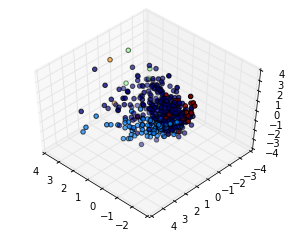

In [129]:
plotClustering(df, labels_set['Laplacian - Agglomerative - complete'], 'Laplacian - Agglomerative - complete', dim=3)

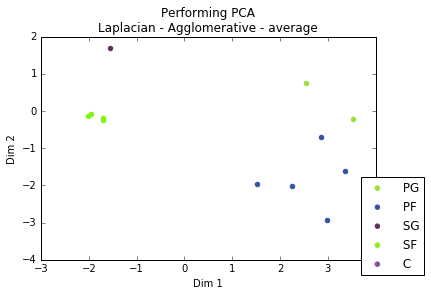

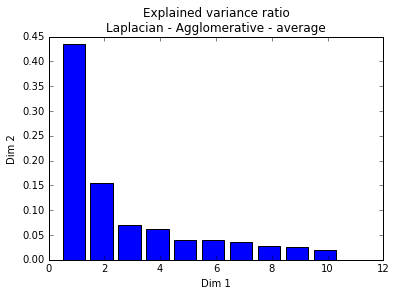

In [127]:
plotClustering(df, labels_set['Laplacian - Agglomerative - average'], 'Laplacian - Agglomerative - average')

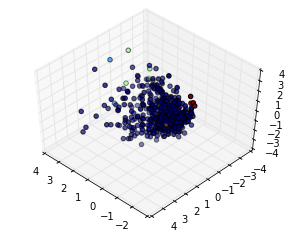

In [128]:
plotClustering(df, labels_set['Laplacian - Agglomerative - average'], 'Laplacian - Agglomerative - average', dim=3)

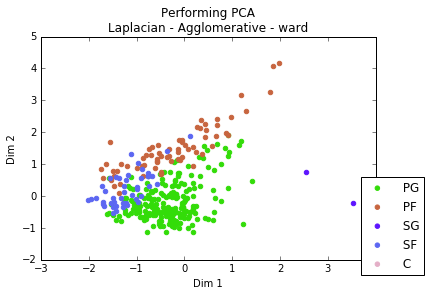

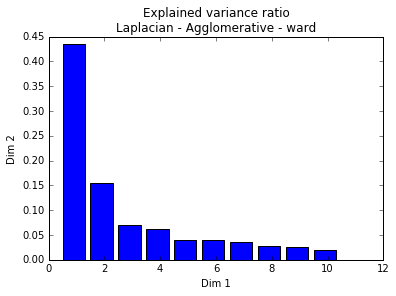

In [130]:
plotClustering(df, labels_set['Laplacian - Agglomerative - ward'], 'Laplacian - Agglomerative - ward')

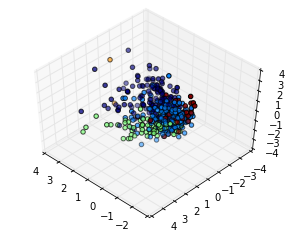

In [131]:
plotClustering(df, labels_set['Laplacian - Agglomerative - ward'], 'Laplacian - Agglomerative - ward', dim=3)

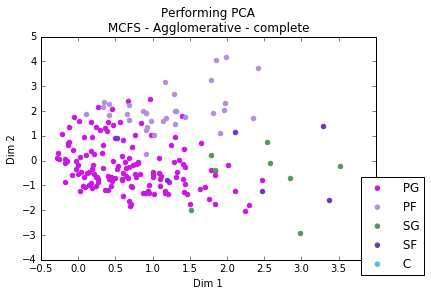

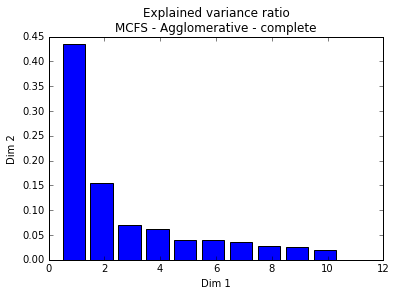

In [132]:
plotClustering(df, labels_set['MCFS - Agglomerative - complete'], 'MCFS - Agglomerative - complete')

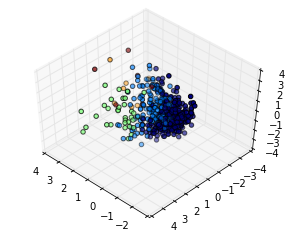

In [133]:
plotClustering(df, labels_set['MCFS - Agglomerative - complete'], 'MCFS - Agglomerative - complete', dim=3)

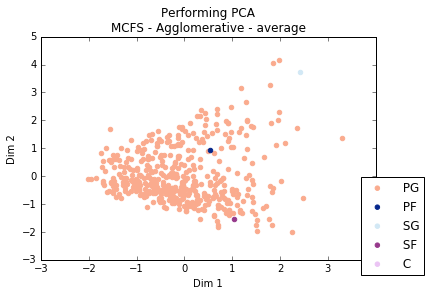

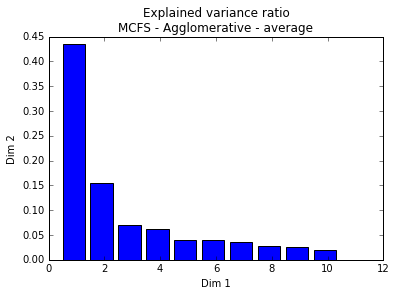

In [136]:
plotClustering(df, labels_set['MCFS - Agglomerative - average'], 'MCFS - Agglomerative - average')

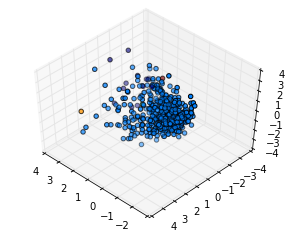

In [137]:
plotClustering(df, labels_set['MCFS - Agglomerative - average'], 'MCFS - Agglomerative - average', dim=3)

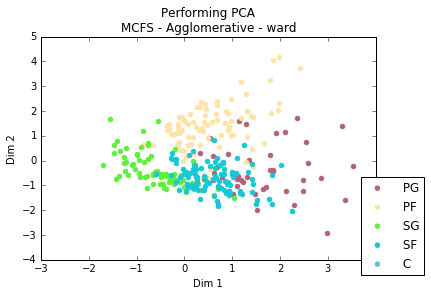

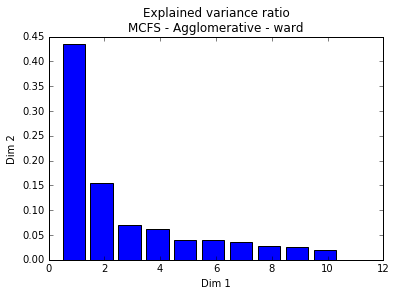

In [138]:
plotClustering(df, labels_set['MCFS - Agglomerative - ward'], 'MCFS - Agglomerative - ward')

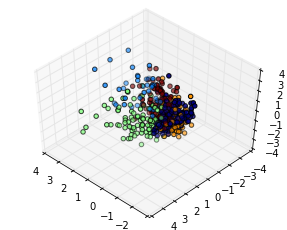

In [139]:
plotClustering(df, labels_set['MCFS - Agglomerative - ward'], 'MCFS - Agglomerative - ward', dim=3)

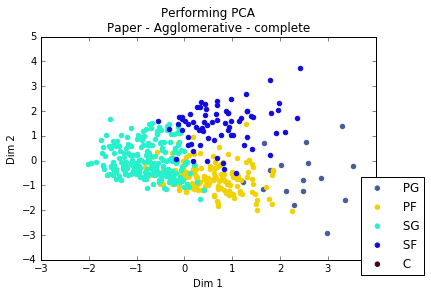

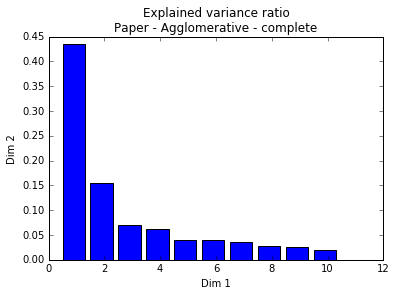

In [140]:
plotClustering(df, labels_set['Paper - Agglomerative - complete'], 'Paper - Agglomerative - complete')

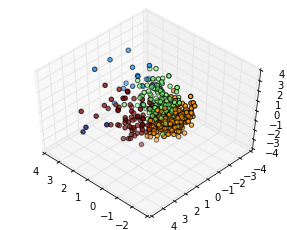

In [141]:
plotClustering(df, labels_set['Paper - Agglomerative - complete'], 'Paper - Agglomerative - complete', dim=3)

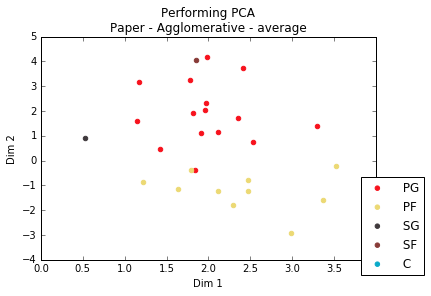

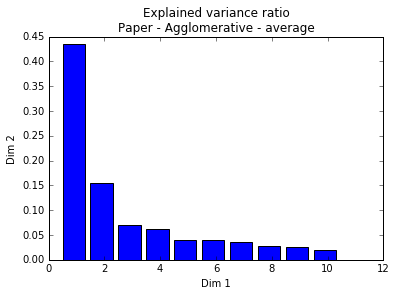

In [142]:
plotClustering(df, labels_set['Paper - Agglomerative - average'], 'Paper - Agglomerative - average')

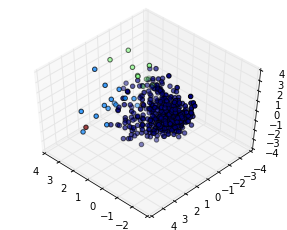

In [143]:
plotClustering(df, labels_set['Paper - Agglomerative - average'], 'Paper - Agglomerative - average', dim=3)

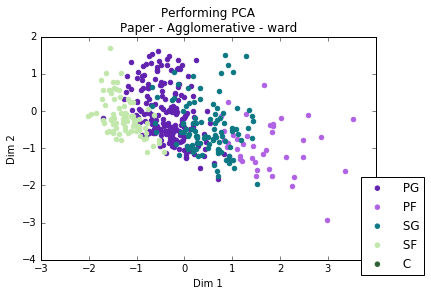

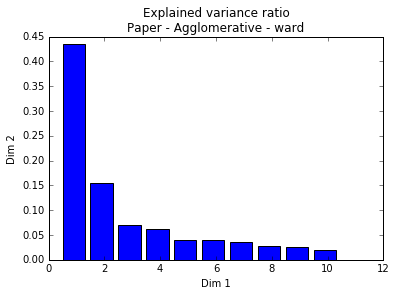

In [144]:
plotClustering(df, labels_set['Paper - Agglomerative - ward'], 'Paper - Agglomerative - ward')

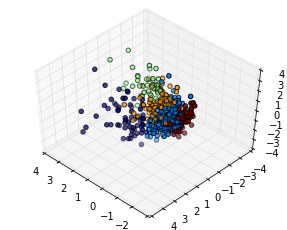

In [145]:
plotClustering(df, labels_set['Paper - Agglomerative - ward'], 'Paper - Agglomerative - ward', dim=3)

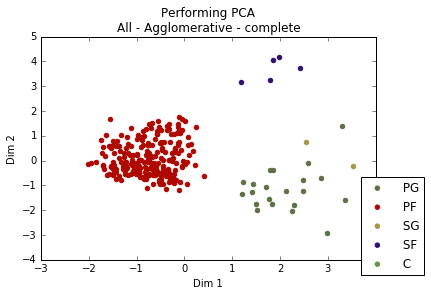

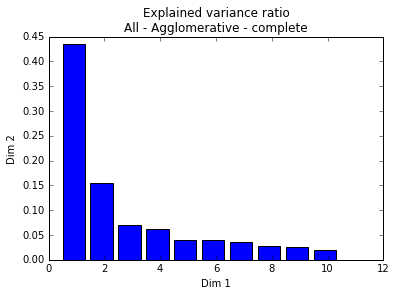

In [146]:
plotClustering(df, labels_set['All - Agglomerative - complete'], 'All - Agglomerative - complete')

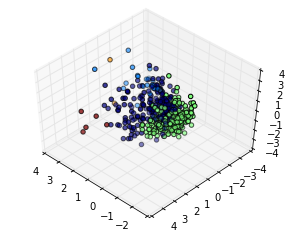

In [147]:
plotClustering(df, labels_set['All - Agglomerative - complete'], 'All - Agglomerative - complete', dim=3)

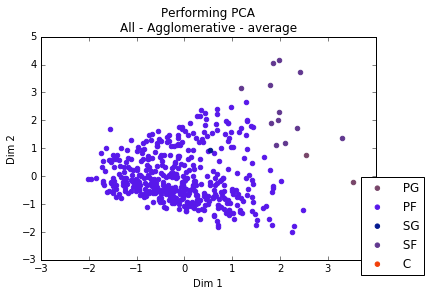

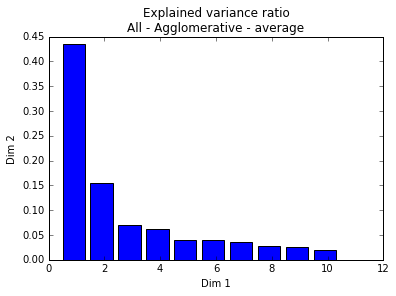

In [148]:
plotClustering(df, labels_set['All - Agglomerative - average'], 'All - Agglomerative - average')

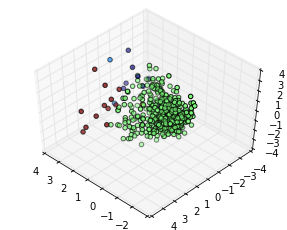

In [149]:
plotClustering(df, labels_set['All - Agglomerative - average'], 'All - Agglomerative - average', dim=3)

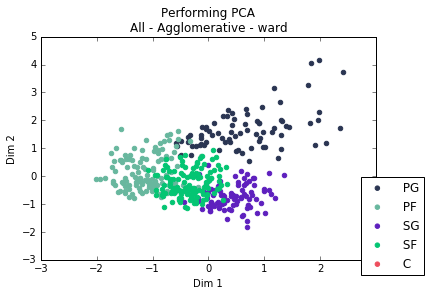

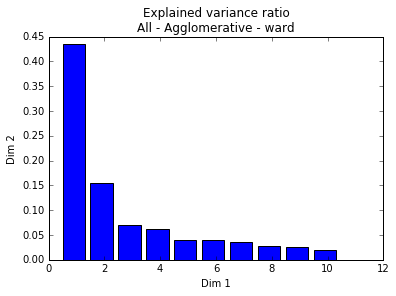

In [150]:
plotClustering(df, labels_set['All - Agglomerative - ward'], 'All - Agglomerative - ward')

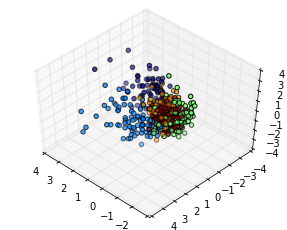

In [151]:
plotClustering(df, labels_set['All - Agglomerative - ward'], 'All - Agglomerative - ward', dim=3)

<div class="alert alert-success">
    <h2>
        ANALYSIS
    </h2>
</div>

Some methods yielded reasonably good results, regarding mostly the random index, the silhouette score and the generated plottings.

When using KMeans as our clustering algorithm, the features generated by the Laplacian score method produced the best random index value: 0.100, which arguably means that there is a clustering configuration. This also can be seen in the plot using the same features that is in this notebook. Moreover, the silhouette score is among the best values.

When using agglomerative methods, we observe that combinations of a agglomerative clustering complete linkage and either the variables from the paper or the variables determined by a Laplacian score methods produce the best scores:
0.0934 and 0.0768 respectively.

By observing the graphs, one can easily conclude that using agglomerative clusterings using average linkage produce meaningless results, as one can observe that most players are actually in the same cluster.

For this very reason, using average linkage produces good silhouette scores (in fact, there is less intersection between different clusters). Since these algorithms do not generate meaningfull interpretations, we cannot rely on them when doing our analysis.

Thus, one can say that agglomerative clusterings using complete linkage actually generate the best silhouette scores. In particular, using the features from the paper or the ones generated by the MCFS method produces the best scores.

To put it in a nutshell, our clustering analysis determined evidence of clustering configurations and determined that selecting the right subset of features can produce better scores in the metrics we used.
Using the variables from the paper or those generated through the Laplacian score and the MCFS methods generates the best results according to these metrics and this can be seen in our visualization.